# Telecom Churn - ML Group Case Study

##### By: Nisha Kumar 

###### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.
 
 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

###### Definitions of Churn
There are various ways to define churn, such as: 1. Revenue-based churn   2.Usage-based churn

For this project, you will use the **usage-based** definition to define churn.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 

###### business objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

Filename: telecom_churn_data_v1.csv

In [1]:
import pandas as pd

**** Importing Data

In [2]:
churn=pd.read_csv("/Users/nisha/Downloads/telecom_churn_data_v1.csv")

In [3]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
churn.shape

(99999, 226)

### Data Cleaning and Data Preparation

**** Handling missing data*****

**** Missing Values more than 50%

In [5]:
missing=round(100*churn.isnull().sum()/len(churn),2)
print("Columns with more than 50% missing values: ",len(missing.loc[missing>50]))
missing.loc[missing>50]

Columns with more than 50% missing values:  40


date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

**** Imputing with 0 for few missing values*****
Out the these 40 features, many are required and are essential for analysis. The missing values for these features seems to suggest that these customers KPI's did not have any value at that month. We can choose to impute these values with 0 to make enable these features to give value to analysis.

In [6]:
impute0 = ['av_rech_amt_data_6', 'arpu_2g_6', 'arpu_3g_6', 'count_rech_2g_6', 'count_rech_3g_6',
             'max_rech_data_6', 'total_rech_data_6','fb_user_6','night_pck_user_6','av_rech_amt_data_7', 'arpu_2g_7', 'arpu_3g_7', 'count_rech_2g_7', 'count_rech_3g_7',
             'max_rech_data_7', 'total_rech_data_7','fb_user_7','night_pck_user_7','av_rech_amt_data_8', 'arpu_2g_8', 'arpu_3g_8', 'count_rech_2g_8', 'count_rech_3g_8',
             'max_rech_data_8', 'total_rech_data_8','fb_user_8','night_pck_user_8','av_rech_amt_data_9', 'arpu_2g_9', 'arpu_3g_9', 'count_rech_2g_9', 'count_rech_3g_9',
             'max_rech_data_9', 'total_rech_data_9','fb_user_9','night_pck_user_9']

In [7]:
for i in impute0:
    churn[i].fillna(0,inplace=True)

****missing Values more than 50% after 0 imputation*******

In [8]:
missing=round(100*churn.isnull().sum()/len(churn),2)
missing.loc[missing>50]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
dtype: float64

*****dropping columns with more than 50% missing values****

In [9]:
d=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
churn.drop(d,axis=1,inplace=True)

*****missing values more than 2% for columns*****

In [10]:
missing=round(100*churn.isnull().sum()/len(churn),2)
miss=missing.loc[missing>2]
miss=list(miss.index) 
print("Total missing values with more tha 3% missing values :",len(miss))

Total missing values with more tha 3% missing values : 118


In [11]:
churn=churn[~churn[miss].isnull().all(axis=1)]

In [12]:
churn.shape

(99618, 222)

*********Adding New Features:***********

        total_rechg_data6=total_rech_data_6*av_rech_amt_data_6
        1. Total rech_6=total rech_amt_6 +total rechg_data_6
        2. Total rech_7=total rech_amt_7 +total rechg_data_7
        3. avg rechg for 6 &7 =(Total rech_6+Total rech_7)/2

In [13]:
churn['rech_data_6_total']=churn['total_rech_data_6']*churn['av_rech_amt_data_6']
churn['rech_data_7_total']=churn['total_rech_data_7']*churn['av_rech_amt_data_7']
#churn['rech_data_8_total']=churn['total_rech_data_6']*churn['av_rech_amt_data_6']


In [14]:
churn['Total rech_6']=churn['rech_data_6_total']+churn['total_rech_amt_6']
churn['Total rech_7']=churn['rech_data_7_total']+churn['total_rech_amt_7']

In [15]:
churn['avg_amt_6_7']=churn[['Total rech_6','Total rech_7']].mean(axis=1)


******High profitable customer******
    finding 70th percentile and extracting data with more than 70% percentile avg recharge amount for both data & calling -

In [16]:
import numpy as np
amount_70th_percentile = np.percentile(churn['avg_amt_6_7'], 70)

In [17]:
print(amount_70th_percentile)

479.5


        ******Deriving records containing only High profitable customer in a DataFrame and resetting index *********

In [18]:
hvc=churn[churn['avg_amt_6_7']>=amount_70th_percentile] 

In [19]:
hvc.shape

(29906, 227)

**** Total Records for High Profitable Customers= 29906********

In [20]:
hvc = hvc.reset_index(drop=True)


In [21]:
hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_data_6_total,rech_data_7_total,Total rech_6,Total rech_7,avg_amt_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,802,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,720,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,604,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0


    ****finding columns with 0 variance and dropping them as they have not much significance to show any pattern********

In [22]:
zero_var=hvc.var()==0


In [23]:
print(zero_var.sum())
zero_var1=zero_var[zero_var==1].index
print(zero_var1)

12
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [24]:
hvc.drop(zero_var1,axis=1,inplace=True)

*****Deriving and adding the churn variable using features:
total_ic_mou_9,total_ic_mou_9,vol_2g_mb_9,vol_3g_mb_9*****

****where :
        total_ic_mou_9+total_ic_mou_9+vol_2g_mb_9+vol_3g_mb_9==0-> 1 (churned)
    else :
        0: not churned

In [25]:
import numpy as np
hvc['churn']=np.where((hvc['total_ic_mou_9']+hvc['total_og_mou_9']+ hvc['vol_2g_mb_9']+hvc['vol_3g_mb_9']==0),1,0)

#hvc['churn']=hvc.apply(lambda x: 1 if ((x.total_ic_mou_9==0) and x.total_og_mou_9==0 and x.vol_2g_mb_9==0 and x.vol_3g_mb_9'==0 else 0)

In [26]:
print("Total Churned Customers: ",hvc['churn'].sum())

Total Churned Customers:  2418


In [27]:
print("Total % of Churned Customers: " ,round(100* hvc['churn'].sum()/len(hvc),2)) # churn %

Total % of Churned Customers:  8.09


******We need to drop the above list of last month columns entirely.********

In [28]:
col_9List = hvc.filter(regex=('_9')).columns

In [29]:
hvc.drop(col_9List, axis=1, inplace=True)

In [30]:
hvc.shape

(29906, 165)

****Dropping some more columns*****

In [31]:
hvc.drop(['mobile_number'], axis=1, inplace = True)

In [32]:
hvc.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

In [33]:
hvc.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],axis=1, inplace=True)

In [34]:
hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_data_6_total,rech_data_7_total,Total rech_6,Total rech_7,avg_amt_6_7,churn
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,0


In [35]:

from fancyimpute import IterativeImputer

Using TensorFlow backend.


In [36]:
missing=round(100*hvc.isnull().sum()/len(hvc),2)
miss=missing.loc[missing>3]
miss=list(miss.index) 
len(miss)

27

****Using Iterative Imputer to impute columns with more than 3% missing values********
    Note- Iterative Imputer used only for a chunk of columns as it was making the system very slow and it was done in parts due to performance issues

In [37]:
temp=hvc[['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']]

In [38]:

df_columns = temp.columns
ii = IterativeImputer()
dftemp= pd.DataFrame(ii.fit_transform(temp))
dftemp.columns=df_columns
hvc[['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']]=dftemp[['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']]

In [39]:
#for i in list(df_clean.columns):
 # hvc[i]=df_clean[i]
missing=round(100*hvc.isnull().sum()/len(hvc),2)
miss=missing.loc[missing>3]
miss=list(miss.index) 
len(miss)
print(miss)
hvc.shape

['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']


(29906, 158)

****Iterative Imputation for more columns***

In [40]:
temp2=hvc[['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
           'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 
           'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 
           'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 
           'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']]
df_columns = temp2.columns    
ii = IterativeImputer()
dftemp2= pd.DataFrame(ii.fit_transform(temp2))
dftemp2.columns=df_columns  
hvc[['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
           'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 
           'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 
           'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 
           'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']]=dftemp2[['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
           'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 
           'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 
           'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 
           'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']]


In [41]:

missing=round(100*hvc.isnull().sum()/len(hvc),2)
miss=missing.loc[missing>2]
print("Columns with more than 2-3 % missing Values: ",len(miss))

Columns with more than 2-3 % missing Values:  0


In [42]:
hvc.shape

(29906, 158)

In [43]:
missing=round(100*hvc.isnull().sum()/len(hvc),2)
miss=missing.loc[missing>0]
print("Remaining columns with missing values i.e more than 0% and less than 3%) : ",len(miss))


Remaining columns with missing values i.e more than 0% and less than 3%) :  54


In [44]:
hvc_clean=hvc

*****Using median Technique to impute remaining columns with missing values (less than 3%)****

In [45]:
hvc_clean=hvc.fillna(hvc.mean())
missing=round(100*hvc_clean.isnull().sum()/len(hvc_clean),2)
miss=missing.loc[missing>0]
print("Missing values columns : " , len(miss))

Missing values columns :  0


In [46]:
hvc_clean.shape

(29906, 158)

Looking at the problem statement, attributes total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are used to tag churners. So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity.

In [47]:
individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
                   
hvc_clean.drop(individual_cols, axis=1, inplace=True)

In [652]:
hvc_clean.shape

(29906, 107)

Variables night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7 and fb_user_8 are encoded with number 0 and 1. These variables can be considered as Ordered Categorical columns.
Also, the datatype of these variables can be converted to integer.Also

In [48]:
hvc_final=hvc_clean

In [50]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

hvc_clean[category_list] = hvc_clean[category_list].astype(int)


In [51]:
plt.figure(figsize=(20, 5))


var = ['max_rech_data_6', 'max_rech_data_7','max_rech_data_8']
           
for i in enumerate(var[0:3]):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x = i[1], data = hvc_clean)
    plt.title(i[1])

    'roam_og_mou_8'

NameError: name 'plt' is not defined

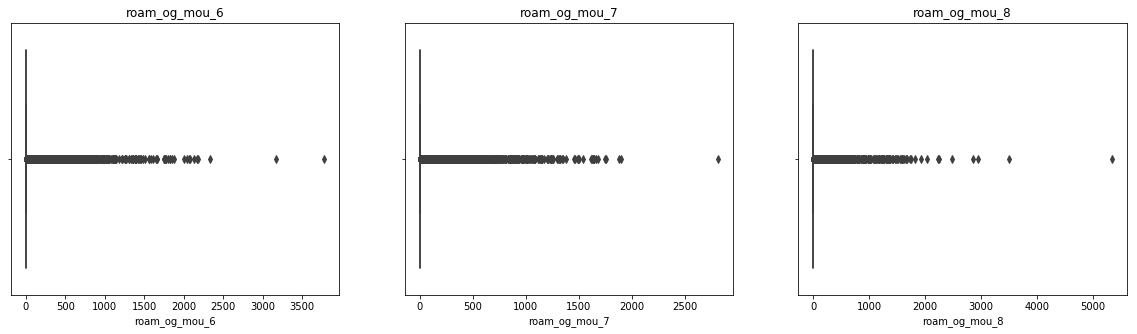

In [784]:
plt.figure(figsize=(20, 5))


var = ['roam_og_mou_6',  'roam_og_mou_7', 'roam_og_mou_8']
           
for i in enumerate(var[0:3]):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x = i[1], data = hvc_clean)
    plt.title(i[1])

   

In [52]:
hvc_clean[['roam_og_mou_6',  'roam_og_mou_7', 'roam_og_mou_8']].describe(percentiles = [0.05,.10,.25,.50,.75,.90,.95,.99])

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
count,29906.000000,29906.000000,29906.000000
mean,27.105763,20.545711,20.721445
std,116.299660,96.168645,104.802679
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,50.510000,31.180000,29.025000


#### Correlation Matrix

In [53]:
hvc_clean.shape

(29906, 107)

In [54]:
hvc_clean.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_data_6_total,rech_data_7_total,Total rech_6,Total rech_7,avg_amt_6_7,churn
arpu_6,1.000000,0.673890,0.614850,0.336680,0.216372,0.189865,0.503186,0.341108,0.291456,0.124468,...,0.058837,0.055373,0.112206,0.045143,0.089110,-0.023862,0.419419,0.211270,0.368623,0.065642
arpu_7,0.673890,1.000000,0.759918,0.210143,0.314374,0.261969,0.350875,0.482936,0.386513,0.091613,...,0.083545,0.102169,0.055121,0.059089,-0.013729,0.091538,0.230773,0.419401,0.384910,-0.011052
arpu_8,0.614850,0.759918,1.000000,0.149375,0.228362,0.331684,0.276933,0.370811,0.505523,0.086920,...,0.146394,0.085114,0.073724,0.104801,-0.004020,0.028596,0.215430,0.295716,0.301778,-0.159777
onnet_mou_6,0.336680,0.210143,0.149375,1.000000,0.750729,0.623379,0.083074,0.032867,0.034148,0.022285,...,-0.104990,-0.110913,-0.102253,-0.034119,-0.098787,-0.101304,0.027959,-0.020083,0.004051,0.077764
onnet_mou_7,0.216372,0.314374,0.228362,0.750729,1.000000,0.804208,0.049301,0.077852,0.066843,0.036976,...,-0.103066,-0.108839,-0.106994,-0.033976,-0.101599,-0.099503,-0.014524,0.018716,0.002871,0.027333
onnet_mou_8,0.189865,0.261969,0.331684,0.623379,0.804208,1.000000,0.060984,0.080573,0.117753,0.050030,...,-0.084375,-0.091661,-0.083225,-0.029142,-0.086766,-0.077776,-0.009964,0.022254,0.007624,-0.033193
offnet_mou_6,0.503186,0.350875,0.276933,0.083074,0.049301,0.060984,1.000000,0.738677,0.585810,0.045584,...,-0.093339,-0.102188,-0.087114,-0.019576,-0.110378,-0.129202,0.076745,0.003750,0.046484,0.071395
offnet_mou_7,0.341108,0.482936,0.370811,0.032867,0.077852,0.080573,0.738677,1.000000,0.764275,0.060886,...,-0.094018,-0.103996,-0.099186,-0.021006,-0.116278,-0.122034,0.016966,0.058003,0.044617,0.018751
offnet_mou_8,0.291456,0.386513,0.505523,0.034148,0.066843,0.117753,0.585810,0.764275,1.000000,0.070330,...,-0.064109,-0.077817,-0.071355,-0.011492,-0.094247,-0.102169,0.020232,0.045225,0.038824,-0.060208
roam_ic_mou_6,0.124468,0.091613,0.086920,0.022285,0.036976,0.050030,0.045584,0.060886,0.070330,1.000000,...,0.007527,-0.002358,0.011203,0.006639,-0.027176,-0.022674,0.019186,0.010767,0.017525,0.053387


In [105]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize = (25, 20))

sns.heatmap(hvc_clean.corr())

plt.show()

<Figure size 2500x2000 with 2 Axes>

*****Features with high correlation***

In [55]:
corr_matrix = hvc_clean.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'Total rech_6', 'Total rech_7', 'avg_amt_6_7']


Total features with high correlation -  28


# Model Building

#### SMOTE for Class Imbalance 
    Deriving Train and Test Data for Model building with PCA

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
X= hvc_clean.drop('churn', axis = 1)
y = hvc_clean[['churn']]
df_cols = X.columns
X1=X
y1=y
###################
sm = SMOTE(random_state=12, ratio = 1)
X, y = sm.fit_sample(X, y)
####################
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


/Users/nisha/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/nisha/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/nisha/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.2

(38483, 106)
(38483,)
(16493, 106)
(16493,)


****Test Data and Train data after Class Imbalance for non PCA analysis *****

In [57]:
X_train_np=pd.DataFrame(X_train)
X_test_np=pd.DataFrame(X_test)

X_train_np.columns=df_cols
X_test_np.columns=df_cols
X_train_np.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_data_6_total,rech_data_7_total,Total rech_6,Total rech_7,avg_amt_6_7
0,1821.176000,2018.948000,2014.693,39.360000,73.33000,16.730000,264.730000,334.110000,132.660000,0.000000,...,244.00000,2658.31,1956.800000,2259.330000,0.0,1555.000000,1555.000000,3751.000000,4020.000000,3885.500000
1,317.967000,370.947000,546.528,43.910000,27.28000,62.610000,101.680000,96.890000,110.990000,5.930000,...,879.00000,0.00,0.000000,0.000000,0.0,154.000000,154.000000,548.000000,668.000000,608.000000
2,4.980000,549.687000,0.000,265.901436,273.09219,243.971718,380.955310,385.396401,348.936043,16.436337,...,205.00000,0.00,0.000000,0.000000,0.0,0.000000,655.000000,0.000000,1310.000000,655.000000
3,128.831677,34.545236,0.000,0.000000,0.00000,243.971718,5.685285,0.365635,348.936043,0.000000,...,320.43514,0.00,138.656642,263.027329,0.0,1510.020035,101.537547,1651.203012,142.598083,896.900548
4,0.000000,2281.505000,2680.019,265.901436,31.78000,74.280000,380.955310,158.130000,426.060000,16.436337,...,449.00000,109.58,48.050000,0.000000,0.0,0.000000,0.000000,0.000000,3399.000000,1699.500000


In [58]:
X_test_np.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_data_6_total,rech_data_7_total,Total rech_6,Total rech_7,avg_amt_6_7
0,696.450337,457.562286,258.567499,207.236209,214.543462,60.232194,398.514540,206.141717,153.512566,21.839614,...,506.675581,0.0,0.0,0.000000,0.0,0.000000,17.410476,756.109029,664.874933,710.491981
1,499.946829,294.848224,35.588019,104.540619,117.285273,204.334766,60.601556,38.376642,244.030051,23.091637,...,513.360407,0.0,0.0,0.000000,0.0,1014.444802,167.594220,1592.783534,587.247986,1090.015760
2,351.471079,507.384328,144.360999,331.773562,622.016320,137.761047,215.006981,312.339813,43.525008,0.000000,...,355.378798,0.0,0.0,3.218593,0.0,243.851579,461.111316,660.331022,1058.631873,859.481447
3,681.953774,459.034941,192.076542,1002.189898,815.287732,65.559705,189.718892,150.244562,62.489346,0.000000,...,853.966522,0.0,0.0,0.000000,0.0,0.000000,0.000000,734.317384,503.146929,618.732156
4,1049.508653,8.944276,0.000000,458.837107,157.583545,243.971718,1925.545889,218.231633,348.936043,35.177682,...,1438.493349,0.0,0.0,0.000000,0.0,0.000000,0.000000,1202.808853,0.000000,601.404427


****Class Imbalance rectification analysis-SMOTE***

In [59]:
print('After SMOTE, the shape of train_X: {}'.format(X_train.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train==0)))
print("After SMOTE, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

After SMOTE, the shape of train_X: (38483, 106)
After SMOTE, the shape of train_y: (38483,) 

After SMOTE, counts of label '1': 19206
After SMOTE, counts of label '0': 19277
After SMOTE, churn event rate : 49.91% 



****Scaling the train and test data****

In [60]:
## Scaling the train and test data
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train )
X_test = scaler.fit_transform(X_test)

In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38483, 106)
(38483,)
(16493, 106)
(16493,)


# Model Building

In [62]:
from sklearn.utils import class_weight

### Applying  PCA 

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(svd_solver='randomized', random_state=42)

In [65]:
df_train_pca = pca.fit(X_train)

In [67]:
pca.components_

array([[-4.89022587e-03, -2.50511794e-03,  9.69378829e-05, ...,
         6.67443250e-03,  9.83099398e-03,  1.25726967e-02],
       [-3.61815507e-04,  7.32708468e-03,  1.20529630e-02, ...,
        -1.02672092e-02,  1.09919825e-02,  2.98434794e-04],
       [ 8.11525749e-03, -3.29775301e-03,  5.11425030e-03, ...,
         1.00571994e-02, -1.13694603e-02, -7.45280523e-04],
       ...,
       [ 0.00000000e+00,  7.19172471e-16,  7.09736793e-16, ...,
        -1.93491192e-02,  1.87884557e-01, -5.45415722e-02],
       [ 0.00000000e+00,  4.50569278e-16,  3.16966032e-16, ...,
        -2.30314574e-01, -4.42168570e-02, -2.24891345e-01],
       [ 0.00000000e+00, -1.53279142e-14,  1.00951330e-14, ...,
        -2.29319761e-01, -1.20845150e-01,  3.57059559e-01]])

In [68]:
pca.explained_variance_ratio_

array([5.66837907e-01, 1.19704697e-01, 8.22492957e-02, 4.95273077e-02,
       2.26130403e-02, 2.12219586e-02, 1.74750400e-02, 1.22963370e-02,
       1.09240245e-02, 7.83153702e-03, 7.59701673e-03, 7.10710946e-03,
       6.72818491e-03, 5.34560727e-03, 5.10781548e-03, 4.19099820e-03,
       4.05460915e-03, 3.72749497e-03, 3.52939930e-03, 3.18717919e-03,
       2.64050086e-03, 2.46598214e-03, 2.42414772e-03, 2.25153894e-03,
       2.16486584e-03, 1.99162160e-03, 1.72564352e-03, 1.48471235e-03,
       1.43971461e-03, 1.34734424e-03, 1.32330640e-03, 1.23823606e-03,
       1.14886829e-03, 1.05455835e-03, 8.82519048e-04, 8.72386531e-04,
       7.36250124e-04, 6.63345058e-04, 6.44863749e-04, 6.16886610e-04,
       6.02349161e-04, 5.47696522e-04, 5.34156273e-04, 5.10995852e-04,
       4.91390294e-04, 4.36866227e-04, 4.17624336e-04, 4.08889245e-04,
       3.94413589e-04, 3.77018776e-04, 3.47548386e-04, 3.39239137e-04,
       2.87636686e-04, 2.72494377e-04, 2.66469768e-04, 2.56314259e-04,
      

#### Cumulative Variance Explained- n_components derived is 17

In [69]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [70]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

NameError: name 'plt' is not defined

***Incremental PCA****

In [71]:
from sklearn.decomposition import IncrementalPCA

In [72]:
pca_final = IncrementalPCA(n_components=17)

In [73]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38483, 17)

In [74]:
df_test_pca = pca_final.fit_transform(X_test)
df_test_pca.shape

(16493, 17)

## Model-1 -> Logistic Regression 

**** Applying Logistic Regression on our principal components****

***using Class_weight="balanced" for class balancing while building model

In [90]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
logistic_pca = LogisticRegression(class_weight="balanced")

In [91]:
#Training the model on the train data
model_pca = logistic_pca.fit(df_train_pca, y_train)

In [92]:
pred_probs_train1=model_pca.predict(df_train_pca)

In [93]:
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
pred_probs_train[:5]

array([0.04721767, 0.13752496, 0.75748083, 0.86692538, 0.07924185])

In [79]:
# predictions on Test data

In [94]:
pred_probs_test1 = model_pca.predict(df_test_pca)
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
pred_probs_test[:10]

array([0.72214954, 0.62116989, 0.82122323, 0.68487828, 0.75766312,
       0.80972516, 0.24244965, 0.7275321 , 0.65553895, 0.78447575])

In [97]:
print ("\nModel Report- Training")
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, pred_probs_train1))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, pred_probs_train1))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, pred_probs_train))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test1)))


Model Report- Training
Accuracy : 0.7596
Recall/Sensitivity : 0.7853
AUC Score (Train): 0.836468
Precision : 0.7045039234655488


In [96]:
print ("\nEvaluation Report (Test data)")
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test1)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test1)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test1)))


Evaluation Report (Test data)
Accuracy : 0.7285515066998121
Recall : 0.7913547452306207
Precision : 0.7045039234655488


***Evaluating the model with cut-off probability as 0.5****

In [98]:
predprob=pd.DataFrame({"Churn":y_train,"Probs":pred_probs_train})

In [99]:
predprob.head()

,Churn,Probs
0,0,0.047218
1,0,0.137525
2,1,0.757481
3,1,0.866925
4,0,0.079242


In [100]:
predprob["Train_Predicted"]=predprob.Probs.map(lambda x:1 if x>0.5 else 0)

In [101]:
predprob.head()

,Churn,Probs,Train_Predicted
0,0,0.047218,0
1,0,0.137525,0
2,1,0.757481,1
3,1,0.866925,1
4,0,0.079242,0


In [687]:
print('For 0.5 as cut off probability Accuracy is', metrics.accuracy_score(predprob.Churn, predprob.Train_Predicted))

For 0.5 as cut off probability Accuracy is 0.7615570511654497


###### Plotting the ROC Curve : An ROC curve demonstrates several things:
     1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will  be accompanied by a decrease in specificity).
    2.The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( predprob.Churn, predprob.Train_Predicted,
                                         drop_intermediate = False )

In [104]:
draw_roc(predprob.Churn, predprob.Train_Predicted)

NameError: name 'plt' is not defined

*****The roc curve is lying in the top left corner which is a sign of a good fit.***

****** Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

In [691]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.Probs.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.Churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

     prob  accuracy     sensi     speci
0.0   0.0  0.500689  1.000000  0.000000
0.1   0.1  0.599096  0.985935  0.211189
0.2   0.2  0.677052  0.957858  0.395472
0.3   0.3  0.725515  0.911459  0.539058
0.4   0.4  0.750747  0.849439  0.651782
0.5   0.5  0.761557  0.782126  0.740932
0.6   0.6  0.757399  0.699294  0.815665
0.7   0.7  0.731752  0.572192  0.891751
0.8   0.8  0.649300  0.351048  0.948374
0.9   0.9  0.539823  0.089682  0.991205


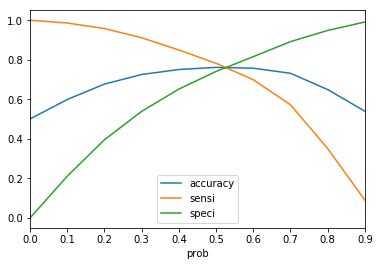

In [692]:
findOptimalCutoff(predprob)

*****From the curve above, 0.52 is the optimum point*** 

**** Operations on Training set with new cut off Probability value of 0.52

In [693]:
predprob['Finalpredicted']=predprob.Probs.map(lambda x:1 if x>0.52 else 0)

In [694]:
predprob.head()

,Churn,Probs,Train_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Finalpredicted
0,0,0.449957,0,1,1,1,1,1,0,0,0,0,0,0
1,1,0.519310,1,1,1,1,1,1,1,0,0,0,0,0
2,0,0.291949,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.234129,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.173535,0,1,1,0,0,0,0,0,0,0,0,0


In [695]:
# Let's check the overall accuracy.
metrics.accuracy_score(predprob.Churn, predprob.Finalpredicted)
print("Training Data Report with cut off probability-0.52")
print("Accuracy : {}".format(metrics.accuracy_score(predprob.Churn, predprob.Finalpredicted)))
print("Recall : {}".format(metrics.recall_score(predprob.Churn, predprob.Finalpredicted)))
print("Precision : {}".format(metrics.precision_score(predprob.Churn, predprob.Finalpredicted)))

Training Data Report with cut off probability-0.52
Accuracy : 0.7602058051607203
Recall : 0.76453186630683
Precision : 0.7584697765420657


In [696]:
print (classification_report(predprob.Churn, predprob.Finalpredicted))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     19215
           1       0.76      0.76      0.76     19268

    accuracy                           0.76     38483
   macro avg       0.76      0.76      0.76     38483
weighted avg       0.76      0.76      0.76     38483



*****Making prediction on test

In [697]:
cutoff_p=0.52
predtest=pd.DataFrame({'Churn':y_test,"Probs":pred_probs_test})


In [698]:
predtest["Predicted"]=predtest.Probs.map(lambda x:1 if x>0.52 else 0)

In [699]:
predtest.head()

,Churn,Probs,Predicted
0,0,0.194127,0
1,1,0.560061,1
2,0,0.683013,1
3,1,0.839623,1
4,0,0.011113,0


In [700]:
metrics.accuracy_score(predtest.Churn, predtest.Predicted)

0.7347359485842478

In [365]:
print("Classification Report Test Data: " )
print(classification_report(predtest.Churn, predtest.Predicted))

Classification Report Test Data: 
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      8286
           1       0.68      0.76      0.72      8207

    accuracy                           0.70     16493
   macro avg       0.71      0.70      0.70     16493
weighted avg       0.71      0.70      0.70     16493



In [701]:
print("Evaluation Report on Test Data cut off probability-0.52")
print("Accuracy : {}".format(metrics.accuracy_score(predtest.Churn,predtest.Predicted)))
print("Recall : {}".format(metrics.recall_score(predtest.Churn,predtest.Predicted)))
print("Precision : {}".format(metrics.precision_score(predtest.Churn,predtest.Predicted)))

Evaluation Report on Test Data cut off probability-0.52
Accuracy : 0.7347359485842478
Recall : 0.7838199513381995
Precision : 0.7126424068134056


In [774]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(predtest.Churn,predtest.Predicted))

Confusion Matrix: 
[[5675 2598]
 [1777 6443]]


## Model-2 -> Random Forest

In [702]:
from sklearn.ensemble import RandomForestClassifier


***Tuning hyperparameters- n_estimators****

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 800,300)}

# instantiate the model (note we are specifying a max_depth)
rf1 = RandomForestClassifier(max_depth=4, class_weight="balanced")
rfgs = GridSearchCV(rf1, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rfgs.fit(df_train_pca, y_train)

In [652]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.154389,0.029149,0.023435,0.004354,50,{'n_estimators': 50},0.752299,0.748398,0.730287,0.734392,...,0.742685,0.008675,3,0.754912,0.749059,0.753379,0.736050,0.750192,0.748718,0.006676
1,8.046226,0.311798,0.134913,0.005352,350,{'n_estimators': 350},0.758707,0.758986,0.729730,0.748885,...,0.748537,0.010687,1,0.757977,0.758674,0.756026,0.751863,0.752908,0.755490,0.002699
2,14.987780,0.532380,0.261628,0.015967,650,{'n_estimators': 650},0.757593,0.757871,0.727222,0.748606,...,0.748258,0.011182,2,0.757420,0.754912,0.753100,0.751794,0.754580,0.754361,0.001891


In [653]:
print('We can get accuracy of',rfgs.best_score_,'using',rfgs.best_params_)

We can get accuracy of 0.7485369329609581 using {'n_estimators': 350}


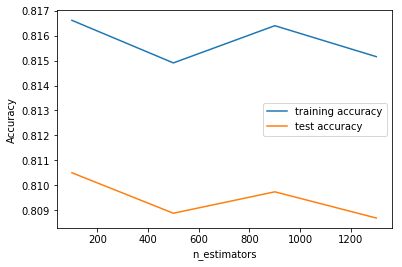

In [422]:
# plotting accuracies with n_estimators
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**** HyperTuning Max Depth ******

In [423]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model (note we are specifying a max_depth)
rf1 = RandomForestClassifier(class_weight="balanced")
rfgs = GridSearchCV(rf1, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rfgs.fit(df_train_pca, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [424]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.933134,0.053682,0.059777,0.003125,10,{'max_depth': 10},0.887748,0.887031,0.890614,0.884165,...,0.886930,0.002248,4,0.929420,0.922553,0.928286,0.926435,0.928529,0.927045,0.002447
1,4.503921,0.031481,0.071830,0.004123,15,{'max_depth': 15},0.912587,0.920946,0.913542,0.914020,...,0.915019,0.003009,3,0.980355,0.980594,0.983758,0.981907,0.981311,0.981585,0.001216
2,4.583008,0.056256,0.072929,0.003688,20,{'max_depth': 20},0.920707,0.920946,0.916408,0.921423,...,0.919652,0.001856,2,0.995402,0.995999,0.996895,0.996059,0.995761,0.996023,0.000493
3,4.758910,0.104177,0.090992,0.031049,25,{'max_depth': 25},0.922140,0.922618,0.918319,0.920468,...,0.920608,0.001606,1,0.999761,1.000000,0.999940,0.999821,0.999940,0.999893,0.000088


In [425]:
print('We can get accuracy of',rfgs.best_score_,'using',rfgs.best_params_)

We can get accuracy of 0.9206075707451602 using {'max_depth': 25}


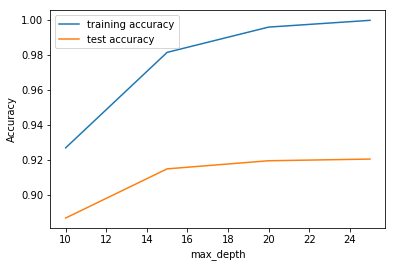

In [426]:
# plotting accuracies with n_estimators
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [427]:
print('We can get accuracy of',rfgs.best_score_,'using',rfgs.best_params_)

We can get accuracy of 0.9206075707451602 using {'max_depth': 25}


**hypertuning max_features*****

In [0]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [3, 8, 13,17]}

# instantiate the model (note we are specifying a max_depth)
rf1 = RandomForestClassifier(max_depth=10, class_weight="balanced")
rfgs = GridSearchCV(rf1, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rfgs.fit(df_train_pca, y_train)

In [665]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.413739,0.085685,0.055989,0.002160,3,{'max_features': 3},0.893006,0.874060,0.856785,0.882107,...,0.876052,0.011852,2,0.922391,0.922391,0.911105,0.918844,0.920515,0.919049,0.004187
1,8.463211,0.338176,0.062273,0.012617,8,{'max_features': 8},0.891056,0.870437,0.866537,0.884058,...,0.877501,0.008957,1,0.924760,0.925805,0.921416,0.920933,0.923163,0.923215,0.001873
2,15.493625,1.489093,0.062968,0.006723,13,{'max_features': 13},0.890220,0.870437,0.863750,0.884615,...,0.874659,0.010826,3,0.924133,0.925805,0.918699,0.923581,0.917311,0.921906,0.003297
3,17.467777,1.356815,0.057345,0.008069,17,{'max_features': 17},0.884369,0.865422,0.861521,0.879599,...,0.869420,0.010775,4,0.919186,0.917375,0.914658,0.918147,0.910414,0.915956,0.003151


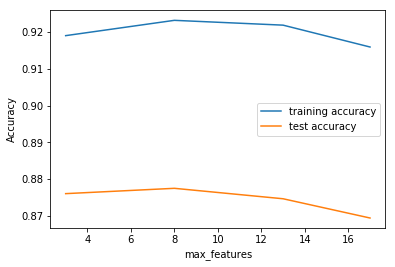

In [666]:
# plotting accuracies with max_features
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [667]:
print('We can get accuracy of',rfgs.best_score_,'using',rfgs.best_params_)

We can get accuracy of 0.8775012246325558 using {'max_features': 8}


***hypertuning hyperparameter Min Samples Leaf***

In [433]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model (note we are specifying a max_depth)
rf1 = RandomForestClassifier(max_depth=10, class_weight="balanced")
rfgs = GridSearchCV(rf1, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rfgs.fit(df_train_pca, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [434]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.258261,0.079839,0.065393,0.013718,100,{'min_samples_leaf': 100},0.815620,0.818963,0.816097,0.807977,...,0.813796,0.004032,1,0.822953,0.827491,0.827909,0.824685,0.824516,0.825511,0.001891
1,2.964460,0.031697,0.052615,0.003026,150,{'min_samples_leaf': 150},0.801767,0.802006,0.803439,0.793647,...,0.800707,0.003578,2,0.804204,0.810712,0.814295,0.807548,0.810246,0.809401,0.003371
2,2.807050,0.058211,0.054392,0.009293,200,{'min_samples_leaf': 200},0.795319,0.794841,0.792692,0.788154,...,0.792252,0.002724,3,0.793993,0.801218,0.802651,0.801756,0.799916,0.799907,0.003087
3,2.647471,0.069888,0.050909,0.002653,250,{'min_samples_leaf': 250},0.787915,0.789348,0.779556,0.781466,...,0.785755,0.004401,4,0.785753,0.792978,0.794710,0.790888,0.795797,0.792025,0.003549
4,2.571249,0.054979,0.052108,0.004405,300,{'min_samples_leaf': 300},0.781705,0.783855,0.784094,0.775018,...,0.780787,0.003370,5,0.779841,0.790052,0.794829,0.784797,0.784930,0.786890,0.005117


In [436]:
print('We can get accuracy of',rfgs.best_score_,'using',rfgs.best_params_)

We can get accuracy of 0.8137955729694134 using {'min_samples_leaf': 100}


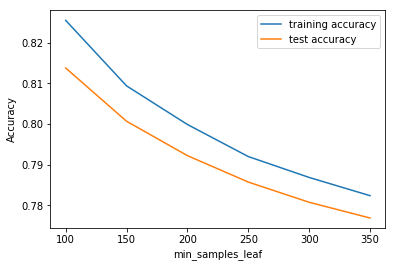

In [437]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***hypertuning hyperparameter Min Samples Split***

In [438]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}
  
# instantiate the model (note we are specifying a max_depth)
rf1 = RandomForestClassifier(max_depth=10, class_weight="balanced")
rfgs = GridSearchCV(rf1, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rfgs.fit(df_train_pca, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [439]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.058382,0.102550,0.064116,0.005752,50,{'min_samples_split': 50},0.875806,0.876761,0.869596,0.867925,...,0.872361,0.003434,1,0.903923,0.897355,0.903147,0.895802,0.900167,0.900079,0.003159
1,3.912810,0.068948,0.061389,0.004724,100,{'min_samples_split': 100},0.857416,0.858849,0.855027,0.850967,...,0.856502,0.003261,2,0.879740,0.876217,0.882904,0.878247,0.879627,0.879347,0.002186
2,3.803410,0.028911,0.058375,0.006574,150,{'min_samples_split': 150},0.851445,0.849295,0.840220,0.839264,...,0.845992,0.005162,3,0.864692,0.861289,0.868573,0.860512,0.866790,0.864371,0.003099
3,3.759199,0.136453,0.057979,0.006735,200,{'min_samples_split': 200},0.839026,0.842130,0.835204,0.830428,...,0.835913,0.004214,4,0.855437,0.852272,0.853944,0.848749,0.851146,0.852310,0.002301
4,3.564885,0.057454,0.052718,0.001757,250,{'min_samples_split': 250},0.832816,0.832099,0.829233,0.823262,...,0.828604,0.003684,5,0.843673,0.842658,0.844987,0.840509,0.839563,0.842278,0.001997


In [440]:
print('We can get accuracy of',rfgs.best_score_,'using',rfgs.best_params_)

We can get accuracy of 0.8723607220081815 using {'min_samples_split': 50}


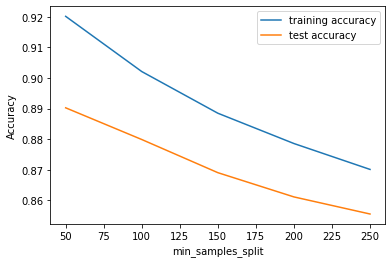

In [0]:
# plotting accuracies with min_sample_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Fitting the final model with the best parameters obtained from grid search.

In [704]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight="balanced",
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=350,
                             random_state=10)

In [705]:
rfc.fit(df_train_pca, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

**** Checking Performance ****

In [706]:
dtrain_predict=rfc.predict(df_train_pca)
dtrain_predprob = rfc.predict_proba(df_train_pca)[:,1]
print("Training Model parameters: ")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predict))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predict))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
#print("Precision : {}".format(metrics.precision_score(predprob.Churn, predprob.Finalpredicted)))


Training Model parameters: 
Accuracy : 0.8494
Recall/Sensitivity : 0.8617
AUC Score (Train): 0.927490


**** Model Performance on Test Data ***

In [709]:
predict_test = rfc.predict(df_test_pca)

In [710]:
print("Model performance on Test data ")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_test, predict_test))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test, predict_test))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, predict_test))

Model performance on Test data 
Accuracy : 0.795
Recall/Sensitivity : 0.853
AUC Score (Train): 0.795009


***Notes***
    The Model Performs quite satisfactorily in Random Forest as:
        1. Accuracy is good in both Training and Test Data sets
        2. Recall/Sensitivity is maintained and is above 85% in both Training and Test Data sets
        3. AUC score is satisfactory but there is a variation of 20% between Training and Test which we will try to improve once we define the threshold probability and make predictions

In [711]:
rfpred_train=pd.DataFrame({'Churn':y_train,'Probs':dtrain_predprob})

In [712]:
rfpred_train.head()

,Churn,Probs
0,0,0.286831
1,1,0.939682
2,0,0.179675
3,0,0.160300
4,0,0.061806


In [713]:
rfpred_train['predicted']=rfpred_train.Probs.map(lambda x:1 if x>0.5 else 0)

In [714]:
rfpred_train.head()

,Churn,Probs,predicted
0,0,0.286831,0
1,1,0.939682,1
2,0,0.179675,0
3,0,0.160300,0
4,0,0.061806,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500689  1.000000  0.000000
0.1   0.1  0.662240  0.996056  0.327505
0.2   0.2  0.750981  0.977579  0.523757
0.3   0.3  0.802848  0.951889  0.653396
0.4   0.4  0.834732  0.917947  0.751288
0.5   0.5  0.849414  0.861688  0.837106
0.6   0.6  0.837747  0.775535  0.900130
0.7   0.7  0.810280  0.677963  0.942961
0.8   0.8  0.749994  0.525171  0.975436
0.9   0.9  0.615596  0.234326  0.997918


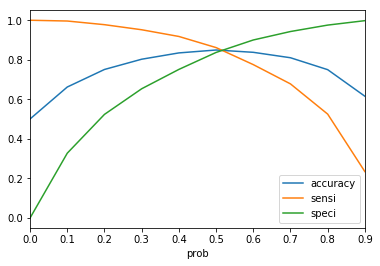

In [715]:
findOptimalCutoff(rfpred_train)

# From the curve above, 0.52 is the optimal point with high enough sensitivity.

***Fine tuning/Evaluating the model with Threshold probability of 0.52***

In [716]:
rfpred_train['Finalpredicted']=rfpred_train.Probs.map(lambda x:1 if x>0.52 else 0)

In [717]:
rfpred_train.head()

,Churn,Probs,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Finalpredicted
0,0,0.286831,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.939682,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.179675,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.160300,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.061806,0,1,0,0,0,0,0,0,0,0,0,0


In [718]:
print (classification_report(rfpred_train.Churn, rfpred_train.Finalpredicted))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     19215
           1       0.85      0.85      0.85     19268

    accuracy                           0.85     38483
   macro avg       0.85      0.85      0.85     38483
weighted avg       0.85      0.85      0.85     38483



In [719]:
rfpred_t =rfc.predict_proba(df_test_pca)[:,1]

In [720]:
rfpred_test=pd.DataFrame({'Churn':y_test,'Probs':rfpred_t})

In [721]:
rfpred_test.head()

,Churn,Probs
0,0,0.279869
1,1,0.525919
2,0,0.766447
3,1,0.543565
4,0,0.117195


In [722]:
rfpred_test['Predicted']=rfpred_test.Probs.map(lambda x:1 if x>0.52 else 0)

In [723]:
rfpred_test.head()

,Churn,Probs,Predicted
0,0,0.279869,0
1,1,0.525919,1
2,0,0.766447,1
3,1,0.543565,1
4,0,0.117195,0


In [724]:
print (classification_report(rfpred_test.Churn, rfpred_test.Predicted))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      8273
           1       0.77      0.84      0.81      8220

    accuracy                           0.80     16493
   macro avg       0.80      0.80      0.80     16493
weighted avg       0.80      0.80      0.80     16493



In [725]:
print("Training Model parameters: ")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, rfpred_train.Finalpredicted))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, rfpred_train.Finalpredicted))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
print("Precision : {}".format(metrics.precision_score(y_train, rfpred_train.Finalpredicted)))

Training Model parameters: 
Accuracy : 0.8493
Recall/Sensitivity : 0.8468
AUC Score (Train): 0.927490
Precision : 0.8513435950952257


In [726]:
print("Test Model parameters: ")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_test, rfpred_test.Predicted))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test, rfpred_test.Predicted))
print ("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, rfpred_t))
print("Precision : {}".format(metrics.precision_score(y_test, rfpred_test.Predicted)))

Test Model parameters: 
Accuracy : 0.7979
Recall/Sensitivity : 0.8438
AUC Score (Test): 0.870826
Precision : 0.7716955941255007


In [773]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, rfpred_test.Predicted))

Confusion Matrix: 
[[6221 2052]
 [1284 6936]]


*****Notes****
    1. Accuracy of model is good in both Training and Test Data sets
    2. Recall/Sensitivity is also good and maintained in both Training and Test Data sets
    3. Precison is also good as above 70%
    4. AUC score of the model has improved to 84.5% post the threshold Probability of 0.52 
    

### Preferred Model Analysis

**Logistic Regression:**
        --Accuracy : 0.7347359485842478
        --Recall : 0.7838199513381995
        --Precision : 0.7126424068134056
**Random Forest:** 
        --Accuracy : 0.7979
        --Recall/Sensitivity : 0.8438
        --Precision : 0.7716955941255007

#### Preferred Model/ Winner :    Random Forest

1. **Random Forest is the preferred Model as Accuracy of the model is better than Logistic Model**
2. **The Recall/Sensitivity & Precison factors are also better and maintained in Random Forest
3. **The model is not overfitting and is generic as there is no drastic difference between Training and Test Results. So the model performs better on unseen data
4. **AUC Score of Model is also good as it is 87%
5. **Comparing the f1 scores and Confusion matrices of both logistic and Random Forest Models Random Forest emerges as the clear winner

    

# Building Model without PCA

#### Model- Random Forest

**** Building the model on training data sets without PCA

In [727]:
from sklearn.ensemble import RandomForestClassifier
rfcnp = RandomForestClassifier(bootstrap=True,class_weight="balanced",
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=350,
                             random_state=10)

In [728]:
rfcnp.fit(X_train_np,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [729]:
dtrain_predict_np=rfcnp.predict(X_train_np)
dtrain_predprob_np = rfcnp.predict_proba(X_train_np)[:,1]
print("Training Model parameters-Training Set: ")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predict_np))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predict_np))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob_np))

Training Model parameters-Training Set: 
Accuracy : 0.919
Recall/Sensitivity : 0.9114
AUC Score (Train): 0.974261


In [730]:
dtest_predict_np=rfcnp.predict(X_test_np)
dtest_predprob_np = rfcnp.predict_proba(X_test_np)[:,1]
print("Evluation report on Test Data: ")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_test, dtest_predict_np))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test ,dtest_predict_np))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, dtest_predprob_np))

Evluation report on Test Data: 
Accuracy : 0.9135
Recall/Sensitivity : 0.9028
AUC Score (Train): 0.970386


##### Notes
    1. Model has done very well with Accuracy of 91%
    2. Sensitivity of the model is very good approx 90%
    

*****Deriving feature importance*****

In [746]:
imp=rfcnp.feature_importances_
imp

array([4.28406129e-04, 1.46933881e-03, 4.99775909e-02, 1.06645913e-03,
       1.19060770e-03, 3.76053500e-03, 7.88559306e-04, 1.11976740e-03,
       4.60896835e-03, 1.79070852e-03, 1.93241880e-02, 1.42151004e-01,
       2.82342698e-03, 2.36997904e-02, 1.46970850e-01, 1.28715924e-03,
       3.34782708e-03, 1.92605665e-02, 3.06355989e-03, 3.88396719e-03,
       5.55624398e-03, 1.28872254e-03, 1.14078208e-03, 2.08157597e-02,
       6.75915442e-03, 5.17215525e-03, 2.74383157e-03, 4.67885679e-03,
       1.70227840e-03, 2.67741121e-02, 9.55609555e-04, 2.14797361e-03,
       3.33455616e-02, 8.58912093e-04, 2.04809262e-03, 2.33877004e-02,
       9.73027147e-04, 1.27485719e-03, 4.48493437e-03, 1.42073412e-03,
       2.96178745e-03, 7.63403344e-02, 5.29574932e-03, 1.08817509e-03,
       8.37034371e-03, 1.88695311e-03, 6.34319645e-04, 4.68574534e-03,
       1.38418725e-03, 7.84641863e-04, 2.72854647e-03, 1.17336010e-03,
       2.89634812e-03, 1.19944299e-02, 3.44923205e-04, 1.28900048e-03,
      

****mapping column names with importance****

In [747]:
#for name, importance in zip(df_cols, imp):
for name, importance in zip(df_cols, imp):
    print(name, "=", importance)

arpu_6 = 0.000428406128694019
arpu_7 = 0.001469338809749534
arpu_8 = 0.04997759093744338
onnet_mou_6 = 0.0010664591255723727
onnet_mou_7 = 0.0011906076989066274
onnet_mou_8 = 0.003760534995909619
offnet_mou_6 = 0.0007885593059849056
offnet_mou_7 = 0.0011197673996465522
offnet_mou_8 = 0.004608968351902497
roam_ic_mou_6 = 0.0017907085242518947
roam_ic_mou_7 = 0.01932418799101418
roam_ic_mou_8 = 0.14215100384340487
roam_og_mou_6 = 0.002823426976749755
roam_og_mou_7 = 0.023699790380323636
roam_og_mou_8 = 0.14697084992987614
loc_og_mou_6 = 0.0012871592444620395
loc_og_mou_7 = 0.0033478270757533245
loc_og_mou_8 = 0.019260566543982654
std_og_mou_6 = 0.003063559885434841
std_og_mou_7 = 0.003883967186024259
std_og_mou_8 = 0.005556243977794144
isd_og_mou_6 = 0.0012887225382097866
isd_og_mou_7 = 0.0011407820835001943
isd_og_mou_8 = 0.020815759711131705
spl_og_mou_6 = 0.006759154416626769
spl_og_mou_7 = 0.005172155252757629
spl_og_mou_8 = 0.0027438315663630285
og_others_6 = 0.004678856789222028
og

In [748]:
featmap=list(zip(df_cols, imp))

In [749]:
featmap

[('arpu_6', 0.000428406128694019),
 ('arpu_7', 0.001469338809749534),
 ('arpu_8', 0.04997759093744338),
 ('onnet_mou_6', 0.0010664591255723727),
 ('onnet_mou_7', 0.0011906076989066274),
 ('onnet_mou_8', 0.003760534995909619),
 ('offnet_mou_6', 0.0007885593059849056),
 ('offnet_mou_7', 0.0011197673996465522),
 ('offnet_mou_8', 0.004608968351902497),
 ('roam_ic_mou_6', 0.0017907085242518947),
 ('roam_ic_mou_7', 0.01932418799101418),
 ('roam_ic_mou_8', 0.14215100384340487),
 ('roam_og_mou_6', 0.002823426976749755),
 ('roam_og_mou_7', 0.023699790380323636),
 ('roam_og_mou_8', 0.14697084992987614),
 ('loc_og_mou_6', 0.0012871592444620395),
 ('loc_og_mou_7', 0.0033478270757533245),
 ('loc_og_mou_8', 0.019260566543982654),
 ('std_og_mou_6', 0.003063559885434841),
 ('std_og_mou_7', 0.003883967186024259),
 ('std_og_mou_8', 0.005556243977794144),
 ('isd_og_mou_6', 0.0012887225382097866),
 ('isd_og_mou_7', 0.0011407820835001943),
 ('isd_og_mou_8', 0.020815759711131705),
 ('spl_og_mou_6', 0.006759

In [750]:
def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1],reverse=True))   


***Sorting Feature Names based on importance in descending order***

In [751]:
Sort_Tuple(featmap)

[('roam_og_mou_8', 0.14697084992987614),
 ('roam_ic_mou_8', 0.14215100384340487),
 ('total_ic_mou_8', 0.07634033436774731),
 ('fb_user_8', 0.052300717373213075),
 ('total_rech_amt_8', 0.05185539597954208),
 ('arpu_8', 0.04997759093744338),
 ('total_rech_data_8', 0.0344285820592214),
 ('max_rech_amt_8', 0.034178650488380646),
 ('total_og_mou_8', 0.033345561592081546),
 ('max_rech_data_8', 0.027833884208403985),
 ('og_others_8', 0.02677411207547937),
 ('roam_og_mou_7', 0.023699790380323636),
 ('loc_ic_mou_8', 0.02338770044172436),
 ('isd_og_mou_8', 0.020815759711131705),
 ('roam_ic_mou_7', 0.01932418799101418),
 ('loc_og_mou_8', 0.019260566543982654),
 ('count_rech_2g_8', 0.014213226532918495),
 ('total_rech_num_8', 0.011994429944571675),
 ('vol_3g_mb_8', 0.010216755162265577),
 ('spl_ic_mou_8', 0.008370343712221888),
 ('vol_2g_mb_8', 0.008283979750134231),
 ('spl_og_mou_6', 0.006759154416626769),
 ('count_rech_3g_8', 0.005839060243450501),
 ('std_og_mou_8', 0.005556243977794144),
 ('spl

In [754]:
#Storing data frame with Features & importances
df_feat=pd.DataFrame(imp,index=df_cols)

In [755]:
df_feat.head()

,0
arpu_6,0.000428
arpu_7,0.001469
arpu_8,0.049978
onnet_mou_6,0.001066
onnet_mou_7,0.001191


In [756]:
#sorting the dataframe based on feature importance
final_df = df_feat.sort_values(by=[0], ascending=False)

In [757]:
final_df.head()

,0
roam_og_mou_8,0.146971
roam_ic_mou_8,0.142151
total_ic_mou_8,0.076340
fb_user_8,0.052301
total_rech_amt_8,0.051855


In [766]:
# Deriving top 21 variables

final=final_df[:21]

In [767]:
final.head(21)

,0
roam_og_mou_8,0.146971
roam_ic_mou_8,0.142151
total_ic_mou_8,0.076340
fb_user_8,0.052301
total_rech_amt_8,0.051855
arpu_8,0.049978
total_rech_data_8,0.034429
max_rech_amt_8,0.034179
total_og_mou_8,0.033346
max_rech_data_8,0.027834


**Plotting Bar Graph- Visual Analysis of Important Feature**

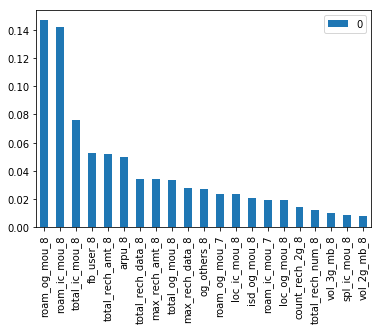

In [768]:
final.plot.bar() 

## Important Feature Analysis

Some of the top main predictiors of churn are the monthly KPI features for the action phase (3rd month August).

The graph above suggest that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:

1.	**roam_og_mou_8**		-- *outgoing roaming calls minutes of usage in month 8*
2.	**roam_ic_mou_8**		-- *incoming roaming calls minutes of usage in month 8*
3.	**total_ic_mou_8**		-- *Total incoming minutes of usage in month 8*
4.	**fb_user_8**			-- *services of Facebook and similar social networking sites for month 8*
5.	**total_rech_amt_8**	-- *total recharge amount in month 8*
6.	**arpu_8**				-- *average revenue per user in month 8*
7.	**total_rech_data_8**	-- *total data recharge (MB) in month 8*
8.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
9.  **total_og_mou_8**      -- *total outgoing calls minutes of usage in month 8*
10.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
11. **og_others_8**
12. **roam_og_mou_7**       -- *outgoing roaming calls minutes of usage in month 7*
13. **loc_ic_mou_8**		-- *local incoming minutes of usage in month 8*
14. **isd_og_mou_8**        -- *outgoing ISD minutes of usage in month 8*
15. **roam_ic_mou_7**       -- *incoming roaming calls minutes of usage in month 8*
16.	**loc_og_mou_8**		-- *local outgoing calls minutes of usage in month 8*
17. **count_rech_2g_8**     -- *Number of 2g data recharge in month 8*
18. **total_rech_num_8**    -- *total number of recharges done in the month 8*
19. **vol_3g_mb_8**         -- *volume of 3G data (MB) consumed for month 8*
20. **spl_ic_mou_8**        -- *Special incoming call for the month of 7*
21. **vol_2g_mb_8**         -- *volume of 2G data (MB) consumed for month 8*

**Notes**

 1. **Local& Roaming calls Mou's be it incoming or outgoing have a very important role for churn predictions.**
 2. **Reduction in these KPI's forms a clear indicator of churn.**
 3. **Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.**
 4. **Data Usage and Social Networking sites packages also are a vital factor in retaining customers**
 
    *Next, we will look at some of the stratergic steps which can be taken to retain these predicted churners.*

#### Strategies to Manage customer churn

1. **Monitoring Drop in usage**

   --*Telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month. If feasible, the company should track these numbers week over week. Since billing cycles are typically monthly, a drop in usage numbers will give the company time to react when tracked at weekly level.
   --*Contact these customers proactively to find out what's affecting their experience. 
   --*offer them attractive data recharge coupons or other incentives to continue to use the services, while the company fixes the issues reported.


2. **Improving Outgoing services**

1. --*The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
2. --*There could be a possibility that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
3. --*Attractive offers like Discounted outgoing rates during particular hours of the day for these customers or For every X mou, grant customer with some % of X free mou.*
4. --*Free monthly outgoing mou's depending on the users past roaming mou usage.*

3. **Improving Roaming services**

1. --*Churners show higher roaming usage than non-churners.*
2. --*The Network operators must futher investigate their roaming tariffs, and quality of service.*
3. --*Might be that the roaming tariffs offered are less competitive than their competitor.
4. --*It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.*
5. --*New campaigns which targets the roaming customers can be rolled out. Like Discounted roaming rates during particular hours of the day or Free monthly roaming mou's depending on the users past roaming mou usage.*

4. **Offer Attractive packages and monthly recharge plans for 
        --*2G & 3G Data Recharge packs*
        --*Facebook an other scoial Networking Sites*